In [3]:
%env OMPL_PATH= /home/seiji/Research/ompl/py-bindings
from nonasymptotic.envs import GrayCodeWalls

import matplotlib.pyplot as plt
import numpy as np

env: OMPL_PATH=/home/seiji/Research/ompl/py-bindings


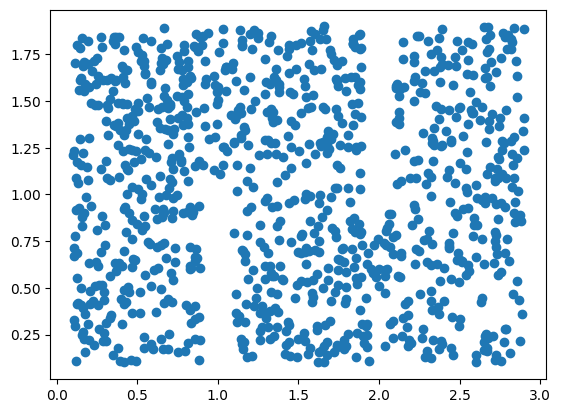

In [22]:
env_2d = GrayCodeWalls(2, 3, 0.1)
points = np.array([env_2d.sample_from_env() for _ in range(1000)])
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points[:, 0], points[:, 1])
plt.show()


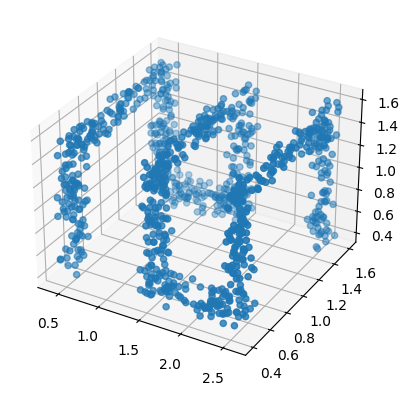

In [32]:
env_3d = GrayCodeWalls(3, 3, 0.4)
points = np.array([env_3d.sample_from_env() for _ in range(1000)])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()
